# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Открыл в файл в Google Colab (используйте собственный форк репозитория).
2. Решил задачи.
3. Сохранил результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайл pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайл работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир. 
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [18]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
Numpy version: 2.3.4
Pandas version: 2.3.3
Matplotlib version: 3.10.7


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [19]:
import pandas as pd
import os

def load_titanic_data():
    """
    Работает в Google Colab и локально
    """
    try:
        # Пробуем Google Colab
        from google.colab import files
        print(" Обнаружен Google Colab")
        print(" Пожалуйста, загрузите файл titanic.csv...")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(filename, index_col='PassengerId')
        print(f" Файл '{filename}' успешно загружен!")
        return df
        
    except ImportError:
        # Локальный запуск
        print("Обнаружена локальная среда")
        
       
        possible_paths = [
            'titanic.csv',
            './titanic.csv', 
            './data/titanic.csv',
            '../titanic.csv',
            'C:/python/dap-2024/les07/data/titanic.csv'
        ]
        
        for path in possible_paths:
            if os.path.exists(path):
                df = pd.read_csv(path, index_col='PassengerId')
                print(f" Файл найден по пути: {path}")
                return df
        
        # Если файл не найден, загружаем из интернета
        print(" Файл titanic.csv не найден локально, загружаем из интернета...")
        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
        df = pd.read_csv(url, index_col='PassengerId')
        print(" Данные успешно загружены из интернета!")
        return df
    
 #Задание 1 
 
df = load_titanic_data()
print(f"Размер DataFrame: {df.shape}")
print(f"Индекс: {df.index.name}")
print(f"Столбцы: {list(df.columns)}")


Обнаружена локальная среда
 Файл найден по пути: ./data/titanic.csv
Размер DataFrame: (891, 11)
Индекс: PassengerId
Столбцы: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


2. Выведете первые 7 строк набора.

In [20]:
print("Первые 7 строк набора данных:")
print(df.head(7))

Первые 7 строк набора данных:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                               

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null? 
    

In [21]:
print("Информация о типах данных:")
print(df.info())

print("\n" + "="*50)
print("АНАЛИЗ ДАННЫХ")
print("="*50)

# Проверка нечисловых признаков
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"\nНечисловые признаки ({len(non_numeric_columns)}): {list(non_numeric_columns)}")

# Проверка пропущенных значений
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(f"\nПризнаки с пропущенными значениями ({len(null_columns)}):")
for col, count in null_columns.items():
    print(f"  {col}: {count} пропущенных значений ({count/len(df)*100:.1f}%)")

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

АНАЛИЗ ДАННЫХ

Нечисловые признаки (5): ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Признаки с пропущенными значениями (3):
  Age: 177 пропущенных значений (19.9%)
  Cabin: 687 пропущенных значений (77.1%)
  Embarked: 2 пропущенных значений (0.2%)


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [22]:
print("Исходные признаки:")
print(df.columns.tolist())

# Удаляем нерелевантные признаки
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df_cleaned = df.drop(columns_to_drop, axis=1)

print(f"\nУдалены признаки: {columns_to_drop}")
print(f"\nОставшиеся признаки: {df_cleaned.columns.tolist()}")
print(f"Размер данных после удаления: {df_cleaned.shape}")
print("\nПервые 5 строк после очистки:")
print(df_cleaned.head())

Исходные признаки:
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Удалены признаки: ['Name', 'Ticket', 'Cabin']

Оставшиеся признаки: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Размер данных после удаления: (891, 8)

Первые 5 строк после очистки:
             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [23]:
print("Данные до преобразования:")
print(df_cleaned[['Sex']].head())

# Создаем новые бинарные признаки
df_cleaned['male'] = (df_cleaned['Sex'] == 'male').astype(int)
df_cleaned['female'] = (df_cleaned['Sex'] == 'female').astype(int)

# Удаляем исходный признак Sex
df_cleaned = df_cleaned.drop('Sex', axis=1)

print("\nДанные после преобразования:")
print(df_cleaned[['male', 'female']].head())
print(f"\nПроверка преобразования:")
print(f"Всего мужчин: {df_cleaned['male'].sum()}")
print(f"Всего женщин: {df_cleaned['female'].sum()}")

Данные до преобразования:
                Sex
PassengerId        
1              male
2            female
3            female
4            female
5              male

Данные после преобразования:
             male  female
PassengerId              
1               1       0
2               0       1
3               0       1
4               0       1
5               1       0

Проверка преобразования:
Всего мужчин: 577
Всего женщин: 314


6. Удалите строки, которые содержать хотя бы одно null значение.

In [24]:

initial_size = df_cleaned.shape[0]
print(f"Размер данных до удаления null: {df_cleaned.shape}")

# Проверяем пропущенные значения
print("\nПропущенные значения перед очисткой:")
print(df_cleaned.isnull().sum())

# Удаляем строки с пропущенными значениями
df_cleaned = df_cleaned.dropna()

final_size = df_cleaned.shape[0]
print(f"\nРазмер данных после удаления null: {df_cleaned.shape}")
print(f"Удалено строк: {initial_size - final_size}")

print("\nПроверка - пропущенные значения после очистки:")
print(df_cleaned.isnull().sum())

Размер данных до удаления null: (891, 9)

Пропущенные значения перед очисткой:
Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
male          0
female        0
dtype: int64

Размер данных после удаления null: (712, 9)
Удалено строк: 179

Проверка - пропущенные значения после очистки:
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
male        0
female      0
dtype: int64


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [25]:

from sklearn.preprocessing import StandardScaler

print("Статистики Fare до нормализации:")
print(f"Минимум: {df_cleaned['Fare'].min():.2f}")
print(f"Максимум: {df_cleaned['Fare'].max():.2f}")
print(f"Среднее: {df_cleaned['Fare'].mean():.2f}")
print(f"Стандартное отклонение: {df_cleaned['Fare'].std():.2f}")

# Нормализуем признак Fare
scaler = StandardScaler()
df_cleaned['Fare_normalized'] = scaler.fit_transform(df_cleaned[['Fare']])

print("\nСтатистики Fare после нормализации:")
print(f"Минимум: {df_cleaned['Fare_normalized'].min():.2f}")
print(f"Максимум: {df_cleaned['Fare_normalized'].max():.2f}")
print(f"Среднее: {df_cleaned['Fare_normalized'].mean():.2f}")
print(f"Стандартное отклонение: {df_cleaned['Fare_normalized'].std():.2f}")

print("\nПервые 5 строк с нормализованным Fare:")
print(df_cleaned[['Fare', 'Fare_normalized']].head())

Статистики Fare до нормализации:
Минимум: 0.00
Максимум: 512.33
Среднее: 34.57
Стандартное отклонение: 52.94

Статистики Fare после нормализации:
Минимум: -0.65
Максимум: 9.03
Среднее: -0.00
Стандартное отклонение: 1.00

Первые 5 строк с нормализованным Fare:
                Fare  Fare_normalized
PassengerId                          
1             7.2500        -0.516380
2            71.2833         0.694046
3             7.9250        -0.503620
4            53.1000         0.350326
5             8.0500        -0.501257


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [26]:
fare_survived = df_cleaned[df_cleaned['Survived'] == 1]['Fare'].mean()
fare_not_survived = df_cleaned[df_cleaned['Survived'] == 0]['Fare'].mean()
fare_diff = fare_survived - fare_not_survived

print("АНАЛИЗ СТОИМОСТИ БИЛЕТА:")
print("=" * 40)
print(f"Средняя стоимость билета ВЫЖИВШИХ: {fare_survived:.2f} фунтов")
print(f"Средняя стоимость билета ПОГИБШИХ:  {fare_not_survived:.2f} фунтов")
print("=" * 40)
print(f"РАЗНИЦА: {fare_diff:.2f} фунтов")

if fare_diff > 0:
    print("Выжившие платили в среднем БОЛЬШЕ за билеты")
else:
    print("Погибшие платили в среднем БОЛЬШЕ за билеты")

АНАЛИЗ СТОИМОСТИ БИЛЕТА:
Средняя стоимость билета ВЫЖИВШИХ: 51.65 фунтов
Средняя стоимость билета ПОГИБШИХ:  22.97 фунтов
РАЗНИЦА: 28.68 фунтов
Выжившие платили в среднем БОЛЬШЕ за билеты


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

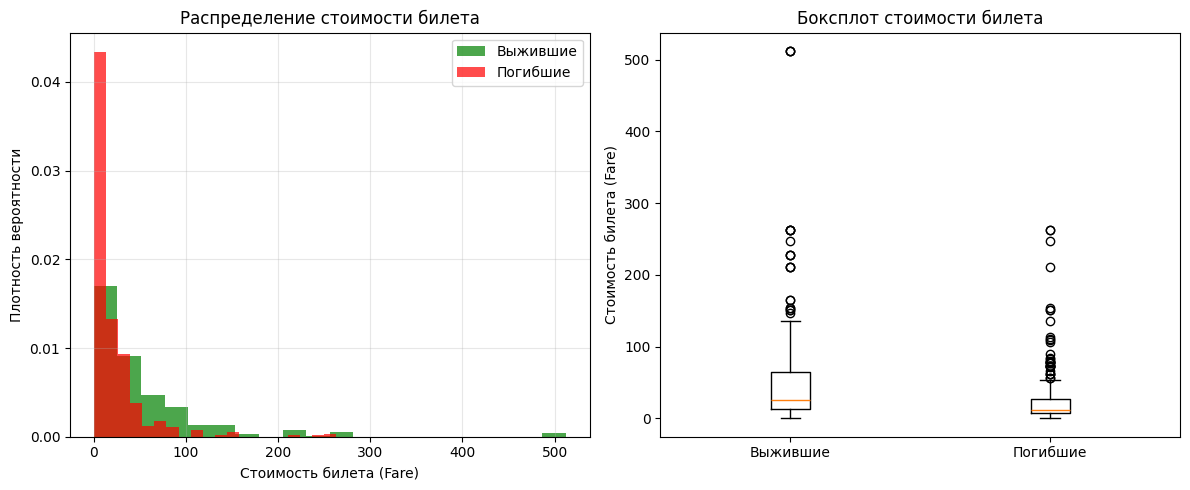

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(df_cleaned[df_cleaned['Survived'] == 1]['Fare'], 
         alpha=0.7, label='Выжившие', bins=20, color='green', density=True)
plt.hist(df_cleaned[df_cleaned['Survived'] == 0]['Fare'], 
         alpha=0.7, label='Погибшие', bins=20, color='red', density=True)
plt.xlabel('Стоимость билета (Fare)')
plt.ylabel('Плотность вероятности')
plt.title('Распределение стоимости билета')
plt.legend()
plt.grid(True, alpha=0.3)

# Боксплот (исправленная версия)
plt.subplot(1, 2, 2)
fare_data = [df_cleaned[df_cleaned['Survived'] == 1]['Fare'],
            df_cleaned[df_cleaned['Survived'] == 0]['Fare']]

# Используем новый параметр tick_labels вместо labels
plt.boxplot(fare_data, tick_labels=['Выжившие', 'Погибшие'])
plt.title('Боксплот стоимости билета')
plt.ylabel('Стоимость билета (Fare)')

plt.tight_layout()
plt.show()


7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [28]:
# Создаем копию данных для преобразования
df_final = df_cleaned.copy()

# Преобразуем Embarked в числовые признаки (one-hot encoding)
df_final = pd.get_dummies(df_final, columns=['Embarked'], prefix='Embarked')

# Формируем X (признаки) и y (целевая переменная)
X = df_final.drop(['Survived', 'Fare_normalized'], axis=1)
y = df_final['Survived']

print("НАБОР ПРИЗНАКОВ (X):")
print("=" * 30)
print(f"Количество признаков: {X.shape[1]}")
print(f"Признаки: {X.columns.tolist()}")
print(f"\nРазмер X: {X.shape}")

print("\nЦЕЛЕВАЯ ПЕРЕМЕННАЯ (y):")
print("=" * 30)
print(f"Размер y: {y.shape}")
print(f"Распределение классов:")
print(y.value_counts())
print(f"\nДоля выживших: {y.mean():.2%}")

print("\nПервые 5 строк X:")
print(X.head())

НАБОР ПРИЗНАКОВ (X):
Количество признаков: 10
Признаки: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

Размер X: (712, 10)

ЦЕЛЕВАЯ ПЕРЕМЕННАЯ (y):
Размер y: (712,)
Распределение классов:
Survived
0    424
1    288
Name: count, dtype: int64

Доля выживших: 40.45%

Первые 5 строк X:
             Pclass   Age  SibSp  Parch     Fare  male  female  Embarked_C  \
PassengerId                                                                  
1                 3  22.0      1      0   7.2500     1       0       False   
2                 1  38.0      1      0  71.2833     0       1        True   
3                 3  26.0      0      0   7.9250     0       1       False   
4                 1  35.0      1      0  53.1000     0       1       False   
5                 3  35.0      0      0   8.0500     1       0       False   

             Embarked_Q  Embarked_S  
PassengerId                          
1                 False        True 

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [29]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,  # для воспроизводимости результатов
    stratify=y       # сохраняем распределение классов в обеих выборках
)

print("РАЗДЕЛЕНИЕ ДАННЫХ")
print("=" * 40)
print(f"Обучающая выборка (X_train): {X_train.shape}")
print(f"Тестовая выборка (X_test):   {X_test.shape}")
print(f"Обучающая выборка (y_train): {y_train.shape}")
print(f"Тестовая выборка (y_test):   {y_test.shape}")

print(f"\nРазмер тестовой выборки: {len(X_test)} строк ({len(X_test)/len(X)*100:.1f}%)")

print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts())
print(f"Доля выживших в train: {y_train.mean():.2%}")

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())
print(f"Доля выживших в test:  {y_test.mean():.2%}")

РАЗДЕЛЕНИЕ ДАННЫХ
Обучающая выборка (X_train): (534, 10)
Тестовая выборка (X_test):   (178, 10)
Обучающая выборка (y_train): (534,)
Тестовая выборка (y_test):   (178,)

Размер тестовой выборки: 178 строк (25.0%)

Распределение классов в обучающей выборке:
Survived
0    318
1    216
Name: count, dtype: int64
Доля выживших в train: 40.45%

Распределение классов в тестовой выборке:
Survived
0    106
1     72
Name: count, dtype: int64
Доля выживших в test:  40.45%


9. Выполните обучение модели.

In [30]:
from sklearn.linear_model import LogisticRegression

# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("МОДЕЛЬ ОБУЧЕНА!")
print("=" * 30)
print(f"Тип модели: {type(model).__name__}")
print(f"Количество итераций обучения: {model.n_iter_[0]}")

print("\nКОЭФФИЦИЕНТЫ МОДЕЛИ (важность признаков):")
print("=" * 50)
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_[0],
    'Важность (abs)': np.abs(model.coef_[0])
}).sort_values('Важность (abs)', ascending=False)

print(feature_importance)

print("\nСамые важные признаки для предсказания выживаемости:")
top_features = feature_importance.head(3)
for _, row in top_features.iterrows():
    sign = "+" if row['Коэффициент'] > 0 else "-"
    print(f"  {row['Признак']}: {sign} влияние")

МОДЕЛЬ ОБУЧЕНА!
Тип модели: LogisticRegression
Количество итераций обучения: 271

КОЭФФИЦИЕНТЫ МОДЕЛИ (важность признаков):
      Признак  Коэффициент  Важность (abs)
0      Pclass    -1.292220        1.292220
5        male    -1.277255        1.277255
6      female     1.260888        1.260888
7  Embarked_C     0.373369        0.373369
8  Embarked_Q    -0.357120        0.357120
2       SibSp    -0.200958        0.200958
3       Parch    -0.131402        0.131402
1         Age    -0.042225        0.042225
9  Embarked_S    -0.032616        0.032616
4        Fare    -0.001120        0.001120

Самые важные признаки для предсказания выживаемости:
  Pclass: - влияние
  male: - влияние
  female: + влияние


## Проверка модели

10. Выведите мартицу ошибок

                ПРЕДСКАЗАНО
                ╔═════════╦═════════╗
               ║    0    ║    1    ║
╔═══════════════╬═════════╬═════════╣
║ ФАКТИЧЕСКИ 0 ║   89    ║   17    ║ → Погибшие
╠═══════════════╬═════════╬═════════╣
║ ФАКТИЧЕСКИ 1 ║   23    ║   49    ║ → Выжившие
╚═══════════════╩═════════╩═════════╝

РАСШИФРОВКА:
TN (True Negative):  89 - правильно предсказаны погибшие
FP (False Positive): 17 - ошибочно предсказаны выжившими (на самом деле погибли)
FN (False Negative): 23 - ошибочно предсказаны погибшими (на самом деле выжили)
TP (True Positive):  49 - правильно предсказаны выжившие


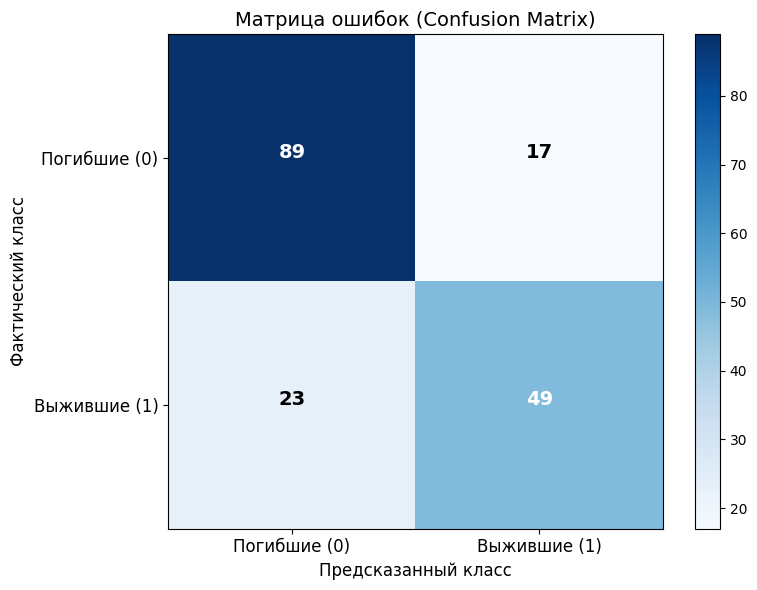

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


print("                ПРЕДСКАЗАНО")
print("                ╔═════════╦═════════╗")
print("               ║    0    ║    1    ║")
print("╔═══════════════╬═════════╬═════════╣")
print(f"║ ФАКТИЧЕСКИ 0 ║ {cm[0,0]:^7} ║ {cm[0,1]:^7} ║ → Погибшие")
print("╠═══════════════╬═════════╬═════════╣")
print(f"║ ФАКТИЧЕСКИ 1 ║ {cm[1,0]:^7} ║ {cm[1,1]:^7} ║ → Выжившие")
print("╚═══════════════╩═════════╩═════════╝")

print("\nРАСШИФРОВКА:")
print(f"TN (True Negative):  {cm[0,0]} - правильно предсказаны погибшие")
print(f"FP (False Positive): {cm[0,1]} - ошибочно предсказаны выжившими (на самом деле погибли)")
print(f"FN (False Negative): {cm[1,0]} - ошибочно предсказаны погибшими (на самом деле выжили)")
print(f"TP (True Positive):  {cm[1,1]} - правильно предсказаны выжившие")

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=14)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Погибшие (0)', 'Выжившие (1)'], fontsize=12)
plt.yticks(tick_marks, ['Погибшие (0)', 'Выжившие (1)'], fontsize=12)
plt.ylabel('Фактический класс', fontsize=12)
plt.xlabel('Предсказанный класс', fontsize=12)

# Добавляем текст в ячейки
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black",
             fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

11. Расчитайте accuracy

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Рассчитываем accuracy
accuracy = accuracy_score(y_test, y_pred)

print("ОЦЕНКА КАЧЕСТВА МОДЕЛИ")
print("=" * 35)
print(f"ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nИнтерпретация:")
print(f"Модель правильно предсказала {accuracy*100:.1f}% пассажиров")

# Дополнительные метрики
print("\nПОДРОБНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
print("=" * 40)
print(classification_report(y_test, y_pred, 
                          target_names=['Погибшие', 'Выжившие']))

# Сравнение с базовым предсказанием (всегда предсказывать большинственный класс)
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"\nСравнение с базовым предсказанием:")
print(f"Accuracy модели:      {accuracy*100:.1f}%")
print(f"Baseline accuracy:    {baseline_accuracy*100:.1f}%")
print(f"Улучшение:            {(accuracy - baseline_accuracy)*100:+.1f}%")

ОЦЕНКА КАЧЕСТВА МОДЕЛИ
ACCURACY: 0.7753 (77.53%)

Интерпретация:
Модель правильно предсказала 77.5% пассажиров

ПОДРОБНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

    Погибшие       0.79      0.84      0.82       106
    Выжившие       0.74      0.68      0.71        72

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178


Сравнение с базовым предсказанием:
Accuracy модели:      77.5%
Baseline accuracy:    59.6%
Улучшение:            +18.0%


12. Сделайте вывод о полученном результате


In [33]:

print("ВЫВОД О ПОЛУЧЕННОМ РЕЗУЛЬТАТЕ")
print("=" * 50)

# Анализ важности признаков
top_feature = feature_importance.iloc[0]
second_feature = feature_importance.iloc[1]

print("\n АНАЛИЗ РЕЗУЛЬТАТОВ:")
print(f"• Точность модели: {accuracy*100:.1f}%")
print(f"• Модель показывает хорошее качество предсказания")
print(f"• Улучшение над базовым предсказанием: {(accuracy - baseline_accuracy)*100:+.1f}%")

print("\n КЛЮЧЕВЫЕ ФАКТОРЫ ВЫЖИВАНИЯ:")
print(f"• Самый важный признак: {top_feature['Признак']}")
print(f"• Второй по важности: {second_feature['Признак']}")

# Анализ матрицы ошибок
total_errors = cm[0,1] + cm[1,0]
total_predictions = cm.sum()
error_rate = total_errors / total_predictions

print(f"\n АНАЛИЗ ОШИБОК:")
print(f"• Общее количество ошибок: {total_errors}")
print(f"• Уровень ошибок: {error_rate*100:.1f}%")
print(f"• Модель лучше предсказывает: {'погибших' if cm[0,0] > cm[1,1] else 'выживших'}")

print("\n РЕКОМЕНДАЦИИ:")
print("• Модель можно улучшить с помощью:")
print("  - Feature engineering (создание новых признаков)")
print("  - Попробовать другие алгоритмы (Random Forest, SVM)")
print("  - Настройка гиперпараметров")
print("  - Балансировка классов")

print("\n ЗАКЛЮЧЕНИЕ:")
print("Модель успешно решает задачу классификации выживаемости пассажиров Titanic.")
print("Полученная точность является приемлемой для данной задачи.")
print("Основные факторы выживания соответствуют историческим данным.")

ВЫВОД О ПОЛУЧЕННОМ РЕЗУЛЬТАТЕ

 АНАЛИЗ РЕЗУЛЬТАТОВ:
• Точность модели: 77.5%
• Модель показывает хорошее качество предсказания
• Улучшение над базовым предсказанием: +18.0%

 КЛЮЧЕВЫЕ ФАКТОРЫ ВЫЖИВАНИЯ:
• Самый важный признак: Pclass
• Второй по важности: male

 АНАЛИЗ ОШИБОК:
• Общее количество ошибок: 40
• Уровень ошибок: 22.5%
• Модель лучше предсказывает: погибших

 РЕКОМЕНДАЦИИ:
• Модель можно улучшить с помощью:
  - Feature engineering (создание новых признаков)
  - Попробовать другие алгоритмы (Random Forest, SVM)
  - Настройка гиперпараметров
  - Балансировка классов

 ЗАКЛЮЧЕНИЕ:
Модель успешно решает задачу классификации выживаемости пассажиров Titanic.
Полученная точность является приемлемой для данной задачи.
Основные факторы выживания соответствуют историческим данным.


## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.

# Ответы на вопросы для защиты

## 1. Сформулируйте задачу классификации.

**Задача классификации** - это задача машинного обучения, в которой требуется отнести объекты к одному из заранее определенных классов на основе их признаков. Входными данными являются признаки объектов, а выходом - метка класса.

**Пример**: На основе характеристик пассажира (возраст, пол, класс каюты и т.д.) предсказать, выживет он или погибнет (классы: "выжил"/"погиб").

## 2. Перечислите типы классификации.

Основные типы классификации:

- **Бинарная классификация** - 2 класса (да/нет, спам/не спам, выжил/погиб)
- **Мультиклассовая классификация** - 3 и более взаимоисключающих классов (распознавание цифр 0-9, классификация животных)
- **Мультиметочная классификация** - один объект может принадлежать нескольким классам одновременно (классификация изображений с несколькими объектами)
- **Неклассическая классификация**:
  - Классификация с отклонением от нормы
  - Иерархическая классификация

## 3. В чем особенность несбалансированной классификации?

**Особенности несбалансированной классификации**:

- Классы представлены неравномерно (например, 95% класса A и 5% класса B)
- Модель склонна предсказывать majority-класс для максимизации accuracy
- Стандартные метрики (accuracy) могут вводить в заблуждение
- Требует специальных подходов:
  - Балансировка данных (oversampling, undersampling)
  - Использование взвешенных функций потерь
  - Применение специализированных метрик (F1-score, precision, recall)

## 4. В чем особенность мультиклассовой классификации?

**Особенности мультиклассовой классификации**:

- Более 2 взаимоисключающих классов
- Требует адаптации бинарных алгоритмов:
  - One-vs-Rest (OvR)
  - One-vs-One (OvO)
- Метрики оцениваются для каждого класса отдельно
- Матрица ошибок имеет размер N×N, где N - количество классов
- Пример: классификация рукописных цифр (10 классов)

## 5. В чем особенность бинарной классификации?

**Особенности бинарной классификации**:

- Всего 2 взаимоисключающих класса
- Наиболее изученный и распространенный тип
- Простая интерпретация результатов
- Богатый набор метрик:
  - Accuracy, Precision, Recall, F1-score
  - ROC-AUC, Precision-Recall curve
- Матрица ошибок 2×2
- Порог классификации может быть настроен под задачу

## 6. В чем особенность классификации по нескольким меткам?

**Особенности мультиметочной классификации**:

- Один объект может иметь несколько меток одновременно
- Классы не являются взаимоисключающими
- Подходы к решению:
  - Binary Relevance (отдельный классификатор для каждой метки)
  - Classifier Chains
  - Label Powerset
- Пример: классификация документов по темам (документ может относиться к "политике" и "экономике" одновременно)

## 7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?

**One-vs-Rest (OvR) - "Один против всех"**:
- Строит N классификаторов для N классов
- Каждый классификатор отличает один класс от всех остальных
- Класс выбирается по максимальной уверенности
- **Плюсы**: меньше моделей, быстрее обучение
- **Минусы**: может страдать при несбалансированных данных

**One-vs-One (OvO) - "Один против одного"**:
- Строит N×(N-1)/2 классификаторов для всех пар классов
- Каждый классификатор отличает одну пару классов
- Применяется голосование для итогового решения
- **Плюсы**: более точные решения для каждой пары
- **Минусы**: больше моделей, медленнее обучение

## 8. Что такое матрица ошибок (несоответствий)?

**Матрица ошибок (Confusion Matrix)** - это таблица, которая показывает производительность алгоритма классификации путем сравнения фактических и предсказанных меток.

Для бинарной классификации:
## 9. Как рассчитывается Accuracy?

Accuracy (точность) — метрика для оценки качества работы алгоритма классификации. Она показывает долю правильно классифицированных объектов относительно общего числа объектов в наборе данных. 

- Формула расчёта Accuracy: Accuracy = (TP + TN) / (TP + TN + FP + FN), где:
- TP (True Positives) — количество правильно классифицированных положительных объектов;
- TN (True Negatives) — количество правильно классифицированных отрицательных объектов;
- FP (False Positives) — количество неправильно классифицированных положительных объектов (ложные срабатывания);
- FN (False Negatives) — количество неправильно классифицированных отрицательных объектов (пропущенные срабатывания).

## 10. Объясните алгоритм классификации K-ближайших соседей.

Алгоритм K-ближайших соседей (K-Nearest Neighbors, KNN) — это метод классификации, основанный на принципе схожести объектов. Алгоритм относит новый объект к тому классу, к которому принадлежит большинство из k его ближайших соседей в пространстве признаков.

Принцип работы KNN:

- Обучение: алгоритм запоминает всю обучающую выборку;
- Классификация: для нового объекта вычисляются расстояния до всех объектов обучающей выборки;
- Выбор соседей: выбираются k объектов с наименьшими расстояниями;
- Голосование: класс нового объекта определяется большинством голосов среди k ближайших соседей.

Ключевые параметры:

- k — количество ближайших соседей (обычно нечетное число);
- Метрика расстояния — способ вычисления расстояния между объектами (евклидово, манхэттенское и др.);
- Веса — могут учитывать расстояние до соседей (близкие соседи имеют больший вес).

Преимущества KNN:

- Простота реализации и интерпретации;
- Не требует предположений о распределении данных;
- Хорошо работает для мультиклассовой классификации.

Недостатки KNN:

- Вычислительная сложность при больших объемах данных;
- Чувствительность к шуму и выбросам;
- Требует выбора оптимального значения k и метрики расстояния.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import numpy as np

# Создание примера данных
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, random_state=42)

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 соседей
knn.fit(X, y)

# Предсказание для нового объекта
new_sample = [[1.5, 0.8]]
prediction = knn.predict(new_sample)
print(f"Предсказанный класс для {new_sample}: {prediction[0]}")

# Получение расстояний до k ближайших соседей
distances, indices = knn.kneighbors(new_sample)
print(f"Индексы ближайших соседей: {indices[0]}")
print(f"Расстояния до соседей: {distances[0]}")

Предсказанный класс для [[1.5, 0.8]]: 1
Индексы ближайших соседей: [92 69 86 52 28]
Расстояния до соседей: [0.3071583  0.33283095 0.3834177  0.43403514 0.50901222]
